<a href="https://colab.research.google.com/github/rzeta0/Make-Your-Own-Mandelbrot/blob/main/3d_julia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** 3D Julia Set **

"Make Your Own Mandelbrot" Second Edition

This work is licensed under CC BY-SA 4.0

In [ ]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

import scipy.ndimage

from matplotlib import cm
from matplotlib.colors import LightSource


In [ ]:
# number of pixels wide and high
resolution = 512

# bottom left corner of square viewport
#bottom_left = complex(-2,-2)
bottom_left = complex(-0.5,-0.5)

# width and height of square viewport
#size = 4
size=1.5


# maximum iterations per test
max_iter = 256

In [ ]:
# value of c

# Examnple 1: Filament
#c = complex(-0.76796, 0.17689)

# Example 2: Cauliflower
c = complex(0.30195,0.0191)

# Example 3: Rabbit
#c = complex(-0.170,0.750)

# Example 4: Lightning
#c = complex(-1.2456,0.34196)

# Example 5: Temples
#c = complex(-1.25,0)

# magnitude of c
abs_c = abs(c)

In [ ]:
# create image as numpy arrray

image = np.full( (resolution,resolution), 255)

In [10]:
# test each point in viewport for divergence

# visit every pixel in the image array
for x in range(resolution):
  for y in range(resolution):

    # convert pixel grid location x,y to initial z
    z = bottom_left + (size * complex(x/(resolution-1), y/(resolution-1)))

    # test for divergence
    for iteration_count in range(1,max_iter+1):
      z = (z*z) + c
      if (abs(z)>2 and abs(z)>abs_c): break
      pass

    # colour pixel according to divergence
    image[y,x] = (255/63) * ((max_iter - iteration_count) % 64)

    pass # end y loop
  pass # end x loop

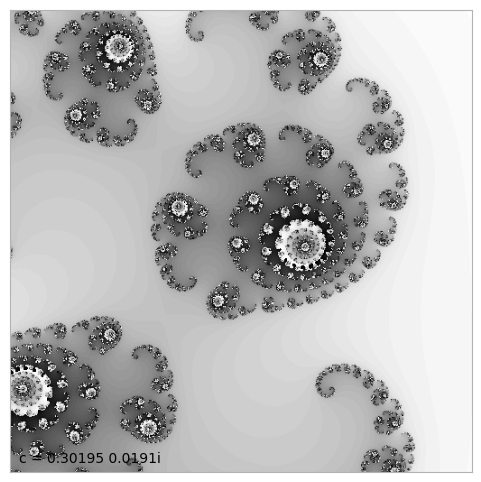

In [11]:
# render image

# create figure of size 6x6
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

# turn of axis ticks
ax.set_xticks([])
ax.set_yticks([])

# grey outline
grey_value = str(0.7)
ax.spines['bottom'].set_color(grey_value)
ax.spines['top'].set_color(grey_value)
ax.spines['right'].set_color(grey_value)
ax.spines['left'].set_color(grey_value)

# plot image array, using grey colour palette
ax.imshow(image, cmap='gray', origin="lower")

# add value of c
ax.text(10, 10, "c = "+str(c.real)+" "+str(c.imag)+"i", fontsize=10)

# export the figure as a PNG image file
plt.savefig("julia_greyscale.png", dpi=600, format="png")

plt.show()

In [12]:
# set up 3d grid
xs = np.linspace(bottom_left.real, bottom_left.real + size, resolution)
ys = np.linspace(bottom_left.imag, bottom_left.imag + size, resolution)
xx, yy = np.meshgrid(xs, ys)

xx.shape

(512, 512)

In [18]:
image2 = np.log(255-image+1)
image2 = scipy.ndimage.gaussian_filter(image2, sigma=2.5)

print(image2.min(), image2.max())

0.07993341959033427 5.440104808732413


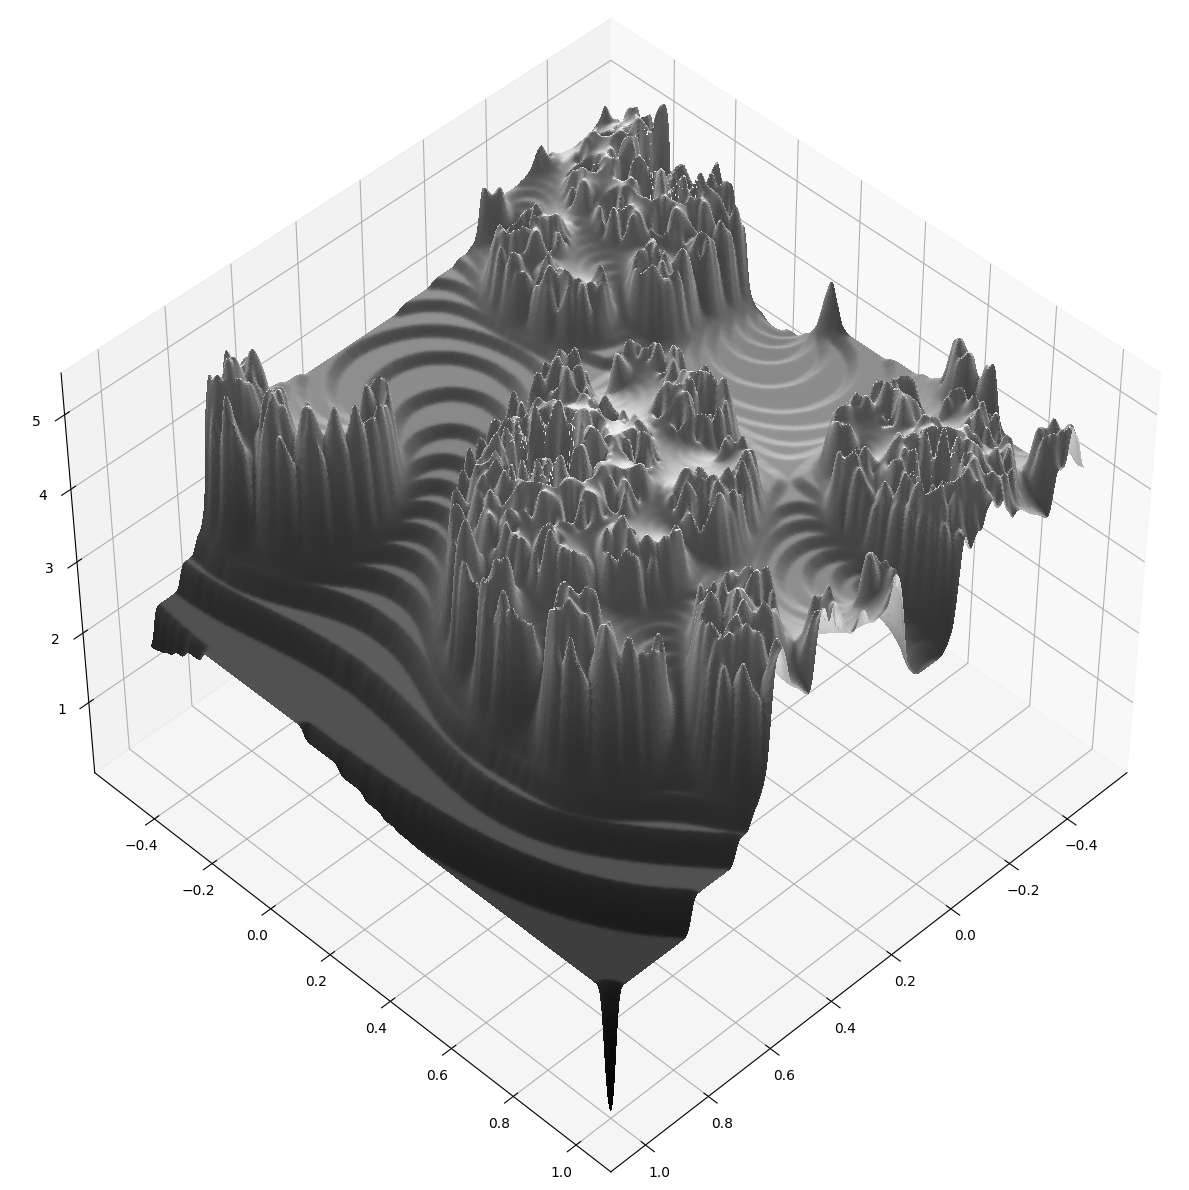

In [20]:
# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
fig.set_size_inches(12,12)

ls = LightSource(270, 45)
rgb = ls.shade(image2, cmap=cm.gist_gray, vert_exag=0.1, blend_mode='soft')

surf = ax.plot_surface(xx, yy , image2, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=True, )


ax.view_init(45, 45)

plt.tight_layout()

plt.savefig("3d_julia.png", dpi=600, format="png")

plt.show()